# Import Library

In [1]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pandas as pd
from yaml import safe_load
import os
from tqdm import tqdm
import pickle
import csv

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

# Data Exploration 

In [2]:
filenames = []
for file in os.listdir('F:/AI ML DL Projects/CSE499 ML Project/ml project data/wcsl/data/'):
    filenames.append(os.path.join('F:/AI ML DL Projects/CSE499 ML Project/ml project data/wcsl/data/', file))

In [3]:
filenames[0:5]

['F:/AI ML DL Projects/CSE499 ML Project/ml project data/wcsl/data/1035535.yaml',
 'F:/AI ML DL Projects/CSE499 ML Project/ml project data/wcsl/data/1035537.yaml',
 'F:/AI ML DL Projects/CSE499 ML Project/ml project data/wcsl/data/1093476.yaml',
 'F:/AI ML DL Projects/CSE499 ML Project/ml project data/wcsl/data/1093477.yaml',
 'F:/AI ML DL Projects/CSE499 ML Project/ml project data/wcsl/data/1093478.yaml']

In [4]:
final_df = pd.DataFrame()
counter = 1
for file in tqdm(filenames):
    with open(file, 'r') as f:
        df = pd.json_normalize(safe_load(f))
        df['match_id'] = counter
        final_df = final_df.append(df)
        counter+=1
        
final_df

100%|██████████| 95/95 [00:22<00:00,  4.17it/s]


,innings,meta.data_version,meta.created,meta.revision,info.balls_per_over,info.city,info.competition,info.dates,info.gender,info.match_type,...,info.registry.people.GK Davis,info.registry.people.AJ Blackwell,info.registry.people.S Ismail,info.registry.people.BL Morgan,info.registry.people.DJS Dottin,info.registry.people.L Marshall,info.registry.people.L Spragg,info.registry.people.S Butler,info.registry.people.IV Collis,info.registry.people.LK Newton
0,[{'1st innings': {'team': 'Loughborough Lightn...,0.92,2022-03-18,2,6,Chelmsford,Women's Cricket Super League,[2016-08-21],female,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Western Storm', 'de...",0.92,2022-03-18,2,6,Chelmsford,Women's Cricket Super League,[2016-08-21],female,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Western Storm', 'de...",0.92,2022-03-18,1,6,Southampton,Women's Cricket Super League,[2017-08-10],female,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[{'1st innings': {'team': 'Yorkshire Diamonds'...,0.92,2022-03-18,1,6,Leeds,Women's Cricket Super League,[2017-08-11],female,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[{'1st innings': {'team': 'Loughborough Lightn...,0.92,2022-03-18,1,6,Taunton,Women's Cricket Super League,[2017-08-12],female,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,[{'1st innings': {'team': 'Lancashire Thunder'...,0.92,2022-03-18,2,6,Guildford,Women's Cricket Super League,[2016-08-09],female,T20,...,NaN,NaN,NaN,648bc30f,53bee17f,NaN,NaN,NaN,NaN,01fcf20f
0,[{'1st innings': {'team': 'Loughborough Lightn...,0.92,2022-03-18,2,6,Loughborough,Women's Cricket Super League,[2016-08-12],female,T20,...,NaN,NaN,NaN,648bc30f,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Southern Vipers', '...",0.92,2022-03-18,2,6,Taunton,Women's Cricket Super League,[2016-08-12],female,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Southern Vipers', '...",0.92,2022-03-18,2,6,Southampton,Women's Cricket Super League,[2016-08-14],female,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# data store

In [5]:
#data store as pickle file
pickle.dump(final_df, open('cse499_wcsl_female.pkl','wb'))

# data load

In [6]:
final_df = pickle.load(open('cse499_wcsl_female.pkl','rb'))
final_df.head()

,innings,meta.data_version,meta.created,meta.revision,info.balls_per_over,info.city,info.competition,info.dates,info.gender,info.match_type,...,info.registry.people.GK Davis,info.registry.people.AJ Blackwell,info.registry.people.S Ismail,info.registry.people.BL Morgan,info.registry.people.DJS Dottin,info.registry.people.L Marshall,info.registry.people.L Spragg,info.registry.people.S Butler,info.registry.people.IV Collis,info.registry.people.LK Newton
0,[{'1st innings': {'team': 'Loughborough Lightn...,0.92,2022-03-18,2,6,Chelmsford,Women's Cricket Super League,[2016-08-21],female,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Western Storm', 'de...",0.92,2022-03-18,2,6,Chelmsford,Women's Cricket Super League,[2016-08-21],female,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Western Storm', 'de...",0.92,2022-03-18,1,6,Southampton,Women's Cricket Super League,[2017-08-10],female,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[{'1st innings': {'team': 'Yorkshire Diamonds'...,0.92,2022-03-18,1,6,Leeds,Women's Cricket Super League,[2017-08-11],female,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[{'1st innings': {'team': 'Loughborough Lightn...,0.92,2022-03-18,1,6,Taunton,Women's Cricket Super League,[2017-08-12],female,T20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Pre-Processing and Analysis

In [7]:
final_df = final_df[[
    'match_id',
    'innings',
    'info.dates',
    'info.gender',
    'info.match_type',
    'info.teams',
    'info.toss.winner',
    'info.toss.decision',
    'info.outcome.winner',
    'info.outcome.by.runs',
    'info.outcome.by.wickets',
    'info.overs',
    'info.umpires',
    'info.venue',
    'info.city'
]]

final_df.head()

,match_id,innings,info.dates,info.gender,info.match_type,info.teams,info.toss.winner,info.toss.decision,info.outcome.winner,info.outcome.by.runs,info.outcome.by.wickets,info.overs,info.umpires,info.venue,info.city
0,1,[{'1st innings': {'team': 'Loughborough Lightn...,[2016-08-21],female,T20,"[Loughborough Lightning, Western Storm]",Western Storm,field,Western Storm,NaN,5.0,20,"[BJ Debenham, Tom Lungley]","County Ground, Chelmsford",Chelmsford
0,2,"[{'1st innings': {'team': 'Western Storm', 'de...",[2016-08-21],female,T20,"[Western Storm, Southern Vipers]",Southern Vipers,field,Southern Vipers,NaN,7.0,20,"[Chris Watts, RJ Warren]","County Ground, Chelmsford",Chelmsford
0,3,"[{'1st innings': {'team': 'Western Storm', 'de...",[2017-08-10],female,T20,"[Western Storm, Southern Vipers]",Southern Vipers,field,Southern Vipers,NaN,9.0,20,"[DJ Millns, SJ O'Shaughnessy]","The Rose Bowl, Southampton",Southampton
0,4,[{'1st innings': {'team': 'Yorkshire Diamonds'...,[2017-08-11],female,T20,"[Yorkshire Diamonds, Lancashire Thunder]",Lancashire Thunder,field,Yorkshire Diamonds,28.0,NaN,20,"[M Burns, NL Bainton]","Headingley, Leeds",Leeds
0,5,[{'1st innings': {'team': 'Loughborough Lightn...,[2017-08-12],female,T20,"[Loughborough Lightning, Western Storm]",Western Storm,field,Western Storm,NaN,5.0,20,"[ID Blackwell, NGB Cook]","The Cooper Associates County Ground, Taunton",Taunton


In [8]:
final_df['info.gender'].value_counts()

female    95
Name: info.gender, dtype: int64

In [9]:
final_df['info.match_type'].value_counts()

T20    95
Name: info.match_type, dtype: int64

In [10]:
final_df['info.overs'].value_counts()

20    95
Name: info.overs, dtype: int64

In [11]:
# Remove 50 over match data
final_df = final_df[final_df['info.overs'] == 20]
final_df.drop(columns=['info.overs','info.match_type'],inplace=True)
final_df.shape

(95, 13)

# extract first & second innings data

In [12]:
# No Result Matches
final_df[final_df['info.outcome.winner'].isnull()]

,match_id,innings,info.dates,info.gender,info.teams,info.toss.winner,info.toss.decision,info.outcome.winner,info.outcome.by.runs,info.outcome.by.wickets,info.umpires,info.venue,info.city
0,41,"[{'1st innings': {'team': 'Southern Vipers', '...",[2018-08-11],female,"[Southern Vipers, Western Storm]",Western Storm,field,NaN,NaN,NaN,"[Chris Watts, Rob White]","County Ground, Bristol",Bristol
0,62,[{'1st innings': {'team': 'Lancashire Thunder'...,[2019-08-15],female,"[Lancashire Thunder, Southern Vipers]",Lancashire Thunder,bat,NaN,NaN,NaN,"[Mark Newell, MV Waldron]","County Ground, Hove",Brighton


# remove no result matches

In [13]:
final_df = final_df.dropna(subset=['info.outcome.winner'])
final_df.shape

(93, 13)

In [14]:
final_df.iloc[0]['innings'][0]['1st innings']['deliveries']

[{0.1: {'non_striker': 'D van Niekerk',
   'bowler': 'FR Davies',
   'runs': {'extras': 1, 'total': 1, 'batsman': 0},
   'extras': {'legbyes': 1},
   'batsman': 'GA Elwiss'}},
 {0.2: {'non_striker': 'GA Elwiss',
   'bowler': 'FR Davies',
   'runs': {'extras': 0, 'total': 0, 'batsman': 0},
   'batsman': 'D van Niekerk'}},
 {0.3: {'non_striker': 'GA Elwiss',
   'bowler': 'FR Davies',
   'runs': {'extras': 0, 'total': 0, 'batsman': 0},
   'batsman': 'D van Niekerk'}},
 {0.4: {'non_striker': 'GA Elwiss',
   'bowler': 'FR Davies',
   'runs': {'extras': 0, 'total': 0, 'batsman': 0},
   'batsman': 'D van Niekerk'}},
 {0.5: {'non_striker': 'GA Elwiss',
   'bowler': 'FR Davies',
   'runs': {'extras': 0, 'total': 0, 'batsman': 0},
   'batsman': 'D van Niekerk'}},
 {0.6: {'non_striker': 'GA Elwiss',
   'bowler': 'FR Davies',
   'runs': {'extras': 0, 'total': 0, 'batsman': 0},
   'batsman': 'D van Niekerk'}},
 {1.1: {'non_striker': 'D van Niekerk',
   'bowler': 'A Shrubsole',
   'runs': {'extras':

In [15]:
count = 0
delivery_df_1st_innings = pd.DataFrame()
for index, row in final_df.iterrows():
    if count in [75,108,150,180,268,360,443,458,584,748,982,1052,1111,1226,1345]:
        count+=1
        continue
    count+=1
    ball_of_match = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    winner = []
    win_by_runs = []
    win_by_wickets = []
    match_id = []
    city = []
    venue = []
    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            winner.append(row['info.outcome.winner'])
            win_by_runs.append(row['info.outcome.by.runs'])
            win_by_wickets.append(row['info.outcome.by.wickets'])
            ball_of_match.append(key)
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')
    loop_df = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'batting_team':batting_team,
            'winner':winner,
            'win_by_runs':win_by_runs,
            'win_by_wickets':win_by_wickets,
            'ball':ball_of_match,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'city':city,
            'venue':venue
        })
    delivery_df_1st_innings = delivery_df_1st_innings.append(loop_df)

In [16]:
delivery_df_1st_innings.head()

,match_id,teams,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,venue
0,1,"[Loughborough Lightning, Western Storm]",Loughborough Lightning,Western Storm,NaN,5.0,0.1,1,0,Chelmsford,"County Ground, Chelmsford"
1,1,"[Loughborough Lightning, Western Storm]",Loughborough Lightning,Western Storm,NaN,5.0,0.2,0,0,Chelmsford,"County Ground, Chelmsford"
2,1,"[Loughborough Lightning, Western Storm]",Loughborough Lightning,Western Storm,NaN,5.0,0.3,0,0,Chelmsford,"County Ground, Chelmsford"
3,1,"[Loughborough Lightning, Western Storm]",Loughborough Lightning,Western Storm,NaN,5.0,0.4,0,0,Chelmsford,"County Ground, Chelmsford"
4,1,"[Loughborough Lightning, Western Storm]",Loughborough Lightning,Western Storm,NaN,5.0,0.5,0,0,Chelmsford,"County Ground, Chelmsford"


In [17]:
count = 0
delivery_df_2nd_innings = pd.DataFrame()
for index, row in final_df.iterrows():
    if count in [75,108,150,180,268,360,443,458,584,748,982,1052,1111,1226,1345]:
        count+=1
        continue
    count+=1
    ball_of_match = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    winner = []
    win_by_runs = []
    win_by_wickets = []
    match_id = []
    city = []
    venue = []
    for ball in row['innings'][1]['2nd innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][1]['2nd innings']['team'])
            teams.append(row['info.teams'])
            winner.append(row['info.outcome.winner'])
            win_by_runs.append(row['info.outcome.by.runs'])
            win_by_wickets.append(row['info.outcome.by.wickets'])
            ball_of_match.append(key)
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')
    loop_df = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'winner':winner,
            'win_by_runs':win_by_runs,
            'win_by_wickets':win_by_wickets,
            'batting_team':batting_team,
            'ball':ball_of_match,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'city':city,
            'venue':venue
        })
    delivery_df_2nd_innings = delivery_df_2nd_innings.append(loop_df)

In [18]:
delivery_df_2nd_innings.head()

,match_id,teams,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,venue
0,1,"[Loughborough Lightning, Western Storm]",Western Storm,NaN,5.0,Western Storm,0.1,0,0,Chelmsford,"County Ground, Chelmsford"
1,1,"[Loughborough Lightning, Western Storm]",Western Storm,NaN,5.0,Western Storm,0.2,0,0,Chelmsford,"County Ground, Chelmsford"
2,1,"[Loughborough Lightning, Western Storm]",Western Storm,NaN,5.0,Western Storm,0.3,0,0,Chelmsford,"County Ground, Chelmsford"
3,1,"[Loughborough Lightning, Western Storm]",Western Storm,NaN,5.0,Western Storm,0.4,0,0,Chelmsford,"County Ground, Chelmsford"
4,1,"[Loughborough Lightning, Western Storm]",Western Storm,NaN,5.0,Western Storm,0.5,0,0,Chelmsford,"County Ground, Chelmsford"


In [19]:
run_data = delivery_df_1st_innings.groupby(['match_id', 'runs'])['runs'].count().reset_index(name="count")

In [20]:
run_data.head()

,match_id,runs,count
0,1,0,53
1,1,1,45
2,1,2,6
3,1,3,1
4,1,4,13


# batting and bowling team separation

In [21]:
def bowl(row):
    for team in row['teams']:
        if team != row['batting_team']:
            return team

In [22]:
# First Innings
delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings.apply(bowl,axis=1)

delivery_df_1st_innings.head()

,match_id,teams,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,venue,bowling_team
0,1,"[Loughborough Lightning, Western Storm]",Loughborough Lightning,Western Storm,NaN,5.0,0.1,1,0,Chelmsford,"County Ground, Chelmsford",Western Storm
1,1,"[Loughborough Lightning, Western Storm]",Loughborough Lightning,Western Storm,NaN,5.0,0.2,0,0,Chelmsford,"County Ground, Chelmsford",Western Storm
2,1,"[Loughborough Lightning, Western Storm]",Loughborough Lightning,Western Storm,NaN,5.0,0.3,0,0,Chelmsford,"County Ground, Chelmsford",Western Storm
3,1,"[Loughborough Lightning, Western Storm]",Loughborough Lightning,Western Storm,NaN,5.0,0.4,0,0,Chelmsford,"County Ground, Chelmsford",Western Storm
4,1,"[Loughborough Lightning, Western Storm]",Loughborough Lightning,Western Storm,NaN,5.0,0.5,0,0,Chelmsford,"County Ground, Chelmsford",Western Storm


In [23]:
# Second Innings 
delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings.apply(bowl,axis=1)

delivery_df_2nd_innings.head()

,match_id,teams,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,venue,bowling_team
0,1,"[Loughborough Lightning, Western Storm]",Western Storm,NaN,5.0,Western Storm,0.1,0,0,Chelmsford,"County Ground, Chelmsford",Loughborough Lightning
1,1,"[Loughborough Lightning, Western Storm]",Western Storm,NaN,5.0,Western Storm,0.2,0,0,Chelmsford,"County Ground, Chelmsford",Loughborough Lightning
2,1,"[Loughborough Lightning, Western Storm]",Western Storm,NaN,5.0,Western Storm,0.3,0,0,Chelmsford,"County Ground, Chelmsford",Loughborough Lightning
3,1,"[Loughborough Lightning, Western Storm]",Western Storm,NaN,5.0,Western Storm,0.4,0,0,Chelmsford,"County Ground, Chelmsford",Loughborough Lightning
4,1,"[Loughborough Lightning, Western Storm]",Western Storm,NaN,5.0,Western Storm,0.5,0,0,Chelmsford,"County Ground, Chelmsford",Loughborough Lightning


In [24]:
# Drop columns
delivery_df_1st_innings.drop(columns=['teams'],inplace=True)
delivery_df_2nd_innings.drop(columns=['teams'],inplace=True)

In [25]:
delivery_df_1st_innings['batting_team'].unique()

array(['Loughborough Lightning', 'Western Storm', 'Yorkshire Diamonds',
       'Southern Vipers', 'Surrey Stars', 'Lancashire Thunder'],
      dtype=object)

In [115]:
# First Innings
# delivery_df_1st_innings['batting_team'] = delivery_df_1st_innings['batting_team'].str.replace('Sylhet Super Stars','Sylhet Strikers')
# delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings['bowling_team'].str.replace('Sylhet Super Stars','Sylhet Strikers')

# delivery_df_1st_innings['batting_team'] = delivery_df_1st_innings['batting_team'].str.replace('Sylhet Thunder','Sylhet Strikers')
# delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings['bowling_team'].str.replace('Sylhet Thunder','Sylhet Strikers')

# delivery_df_1st_innings['batting_team'] = delivery_df_1st_innings['batting_team'].str.replace('Sylhet Sunrisers','Sylhet Strikers')
# delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings['bowling_team'].str.replace('Sylhet Sunrisers','Sylhet Strikers')

# delivery_df_1st_innings['batting_team'] = delivery_df_1st_innings['batting_team'].str.replace('Sylhet Royals','Sylhet Strikers')
# delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings['bowling_team'].str.replace('Sylhet Royals','Sylhet Strikers')

# Second Innings
# delivery_df_2nd_innings['batting_team'] = delivery_df_2nd_innings['batting_team'].str.replace('Sylhet Super Stars','Sylhet Strikers')
# delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings['bowling_team'].str.replace('Sylhet Super Stars','Sylhet Strikers')

# delivery_df_2nd_innings['batting_team'] = delivery_df_2nd_innings['batting_team'].str.replace('Sylhet Thunder','Sylhet Strikers')
# delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings['bowling_team'].str.replace('Sylhet Thunder','Sylhet Strikers')

# delivery_df_2nd_innings['batting_team'] = delivery_df_2nd_innings['batting_team'].str.replace('Sylhet Sunrisers','Sylhet Strikers')
# delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings['bowling_team'].str.replace('Sylhet Sunrisers','Sylhet Strikers')

# delivery_df_2nd_innings['batting_team'] = delivery_df_2nd_innings['batting_team'].str.replace('Sylhet Royals','Sylhet Strikers')
# delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings['bowling_team'].str.replace('Sylhet Royals','Sylhet Strikers')

In [26]:
delivery_df_2nd_innings['batting_team'].unique()

array(['Western Storm', 'Southern Vipers', 'Lancashire Thunder',
       'Surrey Stars', 'Loughborough Lightning', 'Yorkshire Diamonds'],
      dtype=object)

# venue and city

In [27]:
delivery_df_2nd_innings.isnull().sum()

match_id               0
winner                 0
win_by_runs         5329
win_by_wickets      4625
batting_team           0
ball                   0
runs                   0
player_dismissed       0
city                   0
venue                  0
bowling_team           0
dtype: int64

In [28]:
delivery_df_1st_innings['venue'].unique()

array(['County Ground, Chelmsford', 'The Rose Bowl, Southampton',
       'Headingley, Leeds',
       'The Cooper Associates County Ground, Taunton',
       'Kennington Oval, London', 'County Ground, Derby',
       'Old Trafford, Manchester', 'Haslegrave Ground, Loughborough',
       'Stanley Park, Blackpool', 'Clifton Park Ground, York',
       'Aigburth, Liverpool', 'Arundel Castle Cricket Club Ground',
       'County Ground, Bristol', 'County Ground, Hove',
       'Woodbridge Road, Guildford', 'Trafalgar Road Ground, Southport',
       'College Ground, Cheltenham',
       'North Marine Road Ground, Scarborough', 'Edgbaston, Birmingham',
       'York Cricket Club', 'Boughton Hall Cricket Club Ground, Chester',
       'Trent Bridge, Nottingham', 'County Ground, Taunton'], dtype=object)

In [29]:
delivery_df_1st_innings['city'].unique()

array(['Chelmsford', 'Southampton', 'Leeds', 'Taunton', 'London', 'Derby',
       'Manchester', 'Loughborough', 'Blackpool', 'York', 'Liverpool',
       'Arundel', 'Bristol', 'Brighton', 'Guildford', 'Southport',
       'Cheltenham', 'Scarborough', 'Birmingham', 'Chester', 'Nottingham'],
      dtype=object)

In [30]:
delivery_df_2nd_innings[delivery_df_2nd_innings['city'].isnull()]['venue'].value_counts()

Series([], Name: venue, dtype: int64)

In [31]:
# First Innings
# cities = np.where(delivery_df_1st_innings['city'].isnull(), delivery_df_1st_innings['venue'].str.split().apply(lambda x:x[0]), delivery_df_1st_innings['city'])
# delivery_df_1st_innings['city'] = cities

# Second Innings
# cities = np.where(delivery_df_2nd_innings['city'].isnull(), delivery_df_2nd_innings['venue'].str.split().apply(lambda x:x[0]), delivery_df_2nd_innings['city'])
# delivery_df_2nd_innings['city'] = cities

In [32]:
# Drop Venue Column

# First Innings
delivery_df_1st_innings.drop(columns=['venue'],inplace=True)
# Second Innings
delivery_df_2nd_innings.drop(columns=['venue'],inplace=True)

In [33]:
delivery_df_1st_innings['city'].value_counts()

Loughborough    1430
Southampton     1352
Taunton          899
Brighton         880
Leeds            861
Guildford        820
London           733
York             609
Manchester       502
Bristol          501
Liverpool        496
Blackpool        430
Arundel          368
Scarborough      254
Chelmsford       243
Derby            126
Chester          124
Birmingham       123
Cheltenham       122
Nottingham       121
Southport        106
Name: city, dtype: int64

In [34]:
delivery_df_2nd_innings['city'].value_counts()

Loughborough    1302
Southampton     1190
Brighton         832
Taunton          827
Leeds            783
London           699
Guildford        680
York             512
Bristol          464
Liverpool        451
Manchester       427
Blackpool        407
Arundel          273
Scarborough      242
Chelmsford       239
Chester          126
Derby            125
Nottingham       100
Cheltenham        96
Southport         95
Birmingham        84
Name: city, dtype: int64

In [35]:
# Keeping only those venues where played atleast 5 matches

# First Innings
eligible_cities = delivery_df_1st_innings['city'].value_counts()[delivery_df_1st_innings['city'].value_counts() > 300].index.tolist()
delivery_df_1st_innings = delivery_df_1st_innings[delivery_df_1st_innings['city'].isin(eligible_cities)]

# Second Innings
eligible_cities = delivery_df_2nd_innings['city'].value_counts()[delivery_df_2nd_innings['city'].value_counts() > 300].index.tolist()
delivery_df_2nd_innings = delivery_df_2nd_innings[delivery_df_2nd_innings['city'].isin(eligible_cities)]

In [36]:
delivery_df_1st_innings['city'].unique()

array(['Southampton', 'Leeds', 'Taunton', 'London', 'Manchester',
       'Loughborough', 'Blackpool', 'York', 'Liverpool', 'Arundel',
       'Bristol', 'Brighton', 'Guildford'], dtype=object)

# current score

In [37]:
# First Innings
delivery_df_1st_innings['current_score'] = delivery_df_1st_innings.groupby('match_id').cumsum()['runs']

# Second Innings
delivery_df_2nd_innings['current_score'] = delivery_df_2nd_innings.groupby('match_id').cumsum()['runs']

In [38]:
delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score
0,3,Southern Vipers,NaN,9.0,Southern Vipers,0.1,0,0,Southampton,Western Storm,0
1,3,Southern Vipers,NaN,9.0,Southern Vipers,0.2,0,0,Southampton,Western Storm,0
2,3,Southern Vipers,NaN,9.0,Southern Vipers,0.3,0,0,Southampton,Western Storm,0
3,3,Southern Vipers,NaN,9.0,Southern Vipers,0.4,0,0,Southampton,Western Storm,0
4,3,Southern Vipers,NaN,9.0,Southern Vipers,0.5,0,0,Southampton,Western Storm,0


# wicket left

In [39]:
# First Innings
delivery_df_1st_innings['player_dismissed'] = delivery_df_1st_innings['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
delivery_df_1st_innings['player_dismissed'] = delivery_df_1st_innings['player_dismissed'].astype('int')
delivery_df_1st_innings['player_dismissed'] = delivery_df_1st_innings.groupby('match_id').cumsum()['player_dismissed']
delivery_df_1st_innings['wickets_left'] = 10 - delivery_df_1st_innings['player_dismissed']

delivery_df_1st_innings.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left
0,3,Western Storm,Southern Vipers,NaN,9.0,0.1,1,0,Southampton,Southern Vipers,1,10
1,3,Western Storm,Southern Vipers,NaN,9.0,0.2,1,0,Southampton,Southern Vipers,2,10
2,3,Western Storm,Southern Vipers,NaN,9.0,0.3,0,0,Southampton,Southern Vipers,2,10
3,3,Western Storm,Southern Vipers,NaN,9.0,0.4,1,0,Southampton,Southern Vipers,3,10
4,3,Western Storm,Southern Vipers,NaN,9.0,0.5,0,0,Southampton,Southern Vipers,3,10


In [40]:
# Second Innings
delivery_df_2nd_innings['player_dismissed'] = delivery_df_2nd_innings['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
delivery_df_2nd_innings['player_dismissed'] = delivery_df_2nd_innings['player_dismissed'].astype('int')
delivery_df_2nd_innings['player_dismissed'] = delivery_df_2nd_innings.groupby('match_id').cumsum()['player_dismissed']
delivery_df_2nd_innings['wickets_left'] = 10 - delivery_df_2nd_innings['player_dismissed']

delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left
0,3,Southern Vipers,NaN,9.0,Southern Vipers,0.1,0,0,Southampton,Western Storm,0,10
1,3,Southern Vipers,NaN,9.0,Southern Vipers,0.2,0,0,Southampton,Western Storm,0,10
2,3,Southern Vipers,NaN,9.0,Southern Vipers,0.3,0,0,Southampton,Western Storm,0,10
3,3,Southern Vipers,NaN,9.0,Southern Vipers,0.4,0,0,Southampton,Western Storm,0,10
4,3,Southern Vipers,NaN,9.0,Southern Vipers,0.5,0,0,Southampton,Western Storm,0,10


# bowl delivered & bowl left

In [41]:
# First Innings
delivery_df_1st_innings['over'] = delivery_df_1st_innings['ball'].apply(lambda x:str(x).split(".")[0])
delivery_df_1st_innings['ball_no'] = delivery_df_1st_innings['ball'].apply(lambda x:str(x).split(".")[1])
delivery_df_1st_innings['balls_bowled'] = (delivery_df_1st_innings['over'].astype('int')*6) + delivery_df_1st_innings['ball_no'].astype('int')
delivery_df_1st_innings['balls_left'] = 120 - delivery_df_1st_innings['balls_bowled']
delivery_df_1st_innings['balls_left'] = delivery_df_1st_innings['balls_left'].apply(lambda x:0 if x<0 else x)

delivery_df_1st_innings.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left
0,3,Western Storm,Southern Vipers,NaN,9.0,0.1,1,0,Southampton,Southern Vipers,1,10,0,1,1,119
1,3,Western Storm,Southern Vipers,NaN,9.0,0.2,1,0,Southampton,Southern Vipers,2,10,0,2,2,118
2,3,Western Storm,Southern Vipers,NaN,9.0,0.3,0,0,Southampton,Southern Vipers,2,10,0,3,3,117
3,3,Western Storm,Southern Vipers,NaN,9.0,0.4,1,0,Southampton,Southern Vipers,3,10,0,4,4,116
4,3,Western Storm,Southern Vipers,NaN,9.0,0.5,0,0,Southampton,Southern Vipers,3,10,0,5,5,115


In [42]:
# Second Innings
delivery_df_2nd_innings['over'] = delivery_df_2nd_innings['ball'].apply(lambda x:str(x).split(".")[0])
delivery_df_2nd_innings['ball_no'] = delivery_df_2nd_innings['ball'].apply(lambda x:str(x).split(".")[1])
delivery_df_2nd_innings['balls_bowled'] = (delivery_df_2nd_innings['over'].astype('int')*6) + delivery_df_2nd_innings['ball_no'].astype('int')
delivery_df_2nd_innings['balls_left'] = 120 - delivery_df_2nd_innings['balls_bowled']
delivery_df_2nd_innings['balls_left'] = delivery_df_2nd_innings['balls_left'].apply(lambda x:0 if x<0 else x)

delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left
0,3,Southern Vipers,NaN,9.0,Southern Vipers,0.1,0,0,Southampton,Western Storm,0,10,0,1,1,119
1,3,Southern Vipers,NaN,9.0,Southern Vipers,0.2,0,0,Southampton,Western Storm,0,10,0,2,2,118
2,3,Southern Vipers,NaN,9.0,Southern Vipers,0.3,0,0,Southampton,Western Storm,0,10,0,3,3,117
3,3,Southern Vipers,NaN,9.0,Southern Vipers,0.4,0,0,Southampton,Western Storm,0,10,0,4,4,116
4,3,Southern Vipers,NaN,9.0,Southern Vipers,0.5,0,0,Southampton,Western Storm,0,10,0,5,5,115


# current run rate

In [43]:
# First Innings
delivery_df_1st_innings['crr'] = round((delivery_df_1st_innings['current_score']*6)/delivery_df_1st_innings['balls_bowled'], 2)

# Second Innings
delivery_df_2nd_innings['crr'] = round((delivery_df_2nd_innings['current_score']*6)/delivery_df_2nd_innings['balls_bowled'], 2)

In [44]:
delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr
0,3,Southern Vipers,NaN,9.0,Southern Vipers,0.1,0,0,Southampton,Western Storm,0,10,0,1,1,119,0.0
1,3,Southern Vipers,NaN,9.0,Southern Vipers,0.2,0,0,Southampton,Western Storm,0,10,0,2,2,118,0.0
2,3,Southern Vipers,NaN,9.0,Southern Vipers,0.3,0,0,Southampton,Western Storm,0,10,0,3,3,117,0.0
3,3,Southern Vipers,NaN,9.0,Southern Vipers,0.4,0,0,Southampton,Western Storm,0,10,0,4,4,116,0.0
4,3,Southern Vipers,NaN,9.0,Southern Vipers,0.5,0,0,Southampton,Western Storm,0,10,0,5,5,115,0.0


# Score and Win Probabilty (before the start of the match and during the first innings)

# total score counting according to match

In [45]:
total_df = delivery_df_1st_innings.groupby('match_id').sum()['runs'].reset_index()
score_probability_output = delivery_df_1st_innings.merge(total_df,on='match_id')

score_probability_output.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs_x,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,runs_y
0,3,Western Storm,Southern Vipers,NaN,9.0,0.1,1,0,Southampton,Southern Vipers,1,10,0,1,1,119,6.0,70
1,3,Western Storm,Southern Vipers,NaN,9.0,0.2,1,0,Southampton,Southern Vipers,2,10,0,2,2,118,6.0,70
2,3,Western Storm,Southern Vipers,NaN,9.0,0.3,0,0,Southampton,Southern Vipers,2,10,0,3,3,117,4.0,70
3,3,Western Storm,Southern Vipers,NaN,9.0,0.4,1,0,Southampton,Southern Vipers,3,10,0,4,4,116,4.5,70
4,3,Western Storm,Southern Vipers,NaN,9.0,0.5,0,0,Southampton,Southern Vipers,3,10,0,5,5,115,3.6,70


# counting runs in remaining balls

In [46]:
score_probability_output['runs_in_remaining_ball'] = score_probability_output['runs_y'] - score_probability_output['current_score']

score_probability_output.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs_x,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,runs_y,runs_in_remaining_ball
0,3,Western Storm,Southern Vipers,NaN,9.0,0.1,1,0,Southampton,Southern Vipers,1,10,0,1,1,119,6.0,70,69
1,3,Western Storm,Southern Vipers,NaN,9.0,0.2,1,0,Southampton,Southern Vipers,2,10,0,2,2,118,6.0,70,68
2,3,Western Storm,Southern Vipers,NaN,9.0,0.3,0,0,Southampton,Southern Vipers,2,10,0,3,3,117,4.0,70,68
3,3,Western Storm,Southern Vipers,NaN,9.0,0.4,1,0,Southampton,Southern Vipers,3,10,0,4,4,116,4.5,70,67
4,3,Western Storm,Southern Vipers,NaN,9.0,0.5,0,0,Southampton,Southern Vipers,3,10,0,5,5,115,3.6,70,67


# consider batting team win

In [47]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

score_probability_output['result_first_innings'] = score_probability_output.apply(result, axis=1)

score_probability_output.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs_x,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,runs_y,runs_in_remaining_ball,result_first_innings
0,3,Western Storm,Southern Vipers,NaN,9.0,0.1,1,0,Southampton,Southern Vipers,1,10,0,1,1,119,6.0,70,69,0
1,3,Western Storm,Southern Vipers,NaN,9.0,0.2,1,0,Southampton,Southern Vipers,2,10,0,2,2,118,6.0,70,68,0
2,3,Western Storm,Southern Vipers,NaN,9.0,0.3,0,0,Southampton,Southern Vipers,2,10,0,3,3,117,4.0,70,68,0
3,3,Western Storm,Southern Vipers,NaN,9.0,0.4,1,0,Southampton,Southern Vipers,3,10,0,4,4,116,4.5,70,67,0
4,3,Western Storm,Southern Vipers,NaN,9.0,0.5,0,0,Southampton,Southern Vipers,3,10,0,5,5,115,3.6,70,67,0


# final data for score probabilty 

In [48]:
final_score_probability_df = score_probability_output[['batting_team','bowling_team','city', 'current_score', 'balls_bowled', 'balls_left', 'wickets_left','crr', 'runs_in_remaining_ball']]
final_score_probability_df.head()

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr,runs_in_remaining_ball
0,Western Storm,Southern Vipers,Southampton,1,1,119,10,6.0,69
1,Western Storm,Southern Vipers,Southampton,2,2,118,10,6.0,68
2,Western Storm,Southern Vipers,Southampton,2,3,117,10,4.0,68
3,Western Storm,Southern Vipers,Southampton,3,4,116,10,4.5,67
4,Western Storm,Southern Vipers,Southampton,3,5,115,10,3.6,67


In [49]:
final_score_probability_df = final_score_probability_df[final_score_probability_df['balls_left'] != 0]
final_score_probability_df

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr,runs_in_remaining_ball
0,Western Storm,Southern Vipers,Southampton,1,1,119,10,6.00,69
1,Western Storm,Southern Vipers,Southampton,2,2,118,10,6.00,68
2,Western Storm,Southern Vipers,Southampton,2,3,117,10,4.00,68
3,Western Storm,Southern Vipers,Southampton,3,4,116,10,4.50,67
4,Western Storm,Southern Vipers,Southampton,3,5,115,10,3.60,67
...,...,...,...,...,...,...,...,...,...
9875,Yorkshire Diamonds,Western Storm,Leeds,118,115,5,3,6.16,0
9876,Yorkshire Diamonds,Western Storm,Leeds,118,116,4,2,6.10,0
9877,Yorkshire Diamonds,Western Storm,Leeds,118,117,3,2,6.05,0
9878,Yorkshire Diamonds,Western Storm,Leeds,118,118,2,2,6.00,0


# final innings score probability data extraction

In [50]:
pickle.dump(final_score_probability_df, open('wcsl_womens_first_innings_score.pkl','wb'))

# win probabilty

In [51]:
final_win_probability_df = score_probability_output[[
    'batting_team',
    'bowling_team',
    'city',
    'runs_y',
    'result_first_innings'
]]

final_win_probability_df.head()

,batting_team,bowling_team,city,runs_y,result_first_innings
0,Western Storm,Southern Vipers,Southampton,70,0
1,Western Storm,Southern Vipers,Southampton,70,0
2,Western Storm,Southern Vipers,Southampton,70,0
3,Western Storm,Southern Vipers,Southampton,70,0
4,Western Storm,Southern Vipers,Southampton,70,0


# final first innings win data extraction

In [52]:
pickle.dump(final_win_probability_df, open('wcsl_womens_first_innings_win.pkl','wb'))

# Win Probabilty (during the second innings)

# target runs from first innings

In [53]:
total_score_df = delivery_df_1st_innings.groupby([
    'match_id',
]).sum()['runs'].reset_index()

total_score_df.head()

,match_id,runs
0,3,70
1,4,162
2,5,108
3,6,100
4,8,133


In [54]:
total_score_df['target_runs'] = total_score_df['runs'] + 1
total_score_df.drop(columns=['runs'], inplace=True)

total_score_df.head()

,match_id,target_runs
0,3,71
1,4,163
2,5,109
3,6,101
4,8,134


# merge with second innings data

In [55]:
final_2nd_innings_win_df = delivery_df_2nd_innings.merge(total_score_df, on='match_id')
final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs
0,3,Southern Vipers,NaN,9.0,Southern Vipers,0.1,0,0,Southampton,Western Storm,0,10,0,1,1,119,0.0,71
1,3,Southern Vipers,NaN,9.0,Southern Vipers,0.2,0,0,Southampton,Western Storm,0,10,0,2,2,118,0.0,71
2,3,Southern Vipers,NaN,9.0,Southern Vipers,0.3,0,0,Southampton,Western Storm,0,10,0,3,3,117,0.0,71
3,3,Southern Vipers,NaN,9.0,Southern Vipers,0.4,0,0,Southampton,Western Storm,0,10,0,4,4,116,0.0,71
4,3,Southern Vipers,NaN,9.0,Southern Vipers,0.5,0,0,Southampton,Western Storm,0,10,0,5,5,115,0.0,71


# runs left

In [56]:
final_2nd_innings_win_df['runs_left'] = final_2nd_innings_win_df['target_runs'] - final_2nd_innings_win_df['current_score']
final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs,runs_left
0,3,Southern Vipers,NaN,9.0,Southern Vipers,0.1,0,0,Southampton,Western Storm,0,10,0,1,1,119,0.0,71,71
1,3,Southern Vipers,NaN,9.0,Southern Vipers,0.2,0,0,Southampton,Western Storm,0,10,0,2,2,118,0.0,71,71
2,3,Southern Vipers,NaN,9.0,Southern Vipers,0.3,0,0,Southampton,Western Storm,0,10,0,3,3,117,0.0,71,71
3,3,Southern Vipers,NaN,9.0,Southern Vipers,0.4,0,0,Southampton,Western Storm,0,10,0,4,4,116,0.0,71,71
4,3,Southern Vipers,NaN,9.0,Southern Vipers,0.5,0,0,Southampton,Western Storm,0,10,0,5,5,115,0.0,71,71


# required run rate

In [57]:
final_2nd_innings_win_df['rrr'] = round((final_2nd_innings_win_df['runs_left']*6)/final_2nd_innings_win_df['balls_left'], 2)

final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs,runs_left,rrr
0,3,Southern Vipers,NaN,9.0,Southern Vipers,0.1,0,0,Southampton,Western Storm,0,10,0,1,1,119,0.0,71,71,3.58
1,3,Southern Vipers,NaN,9.0,Southern Vipers,0.2,0,0,Southampton,Western Storm,0,10,0,2,2,118,0.0,71,71,3.61
2,3,Southern Vipers,NaN,9.0,Southern Vipers,0.3,0,0,Southampton,Western Storm,0,10,0,3,3,117,0.0,71,71,3.64
3,3,Southern Vipers,NaN,9.0,Southern Vipers,0.4,0,0,Southampton,Western Storm,0,10,0,4,4,116,0.0,71,71,3.67
4,3,Southern Vipers,NaN,9.0,Southern Vipers,0.5,0,0,Southampton,Western Storm,0,10,0,5,5,115,0.0,71,71,3.70


In [58]:
final_2nd_innings_win_df.isnull().sum()

match_id               0
winner                 0
win_by_runs         4289
win_by_wickets      4285
batting_team           0
ball                   0
runs                   0
player_dismissed       0
city                   0
bowling_team           0
current_score          0
wickets_left           0
over                   0
ball_no                0
balls_bowled           0
balls_left             0
crr                    0
target_runs            0
runs_left              0
rrr                    1
dtype: int64

In [59]:
final_2nd_innings_win_df = final_2nd_innings_win_df[final_2nd_innings_win_df['balls_left'] != 0]

In [60]:
final_2nd_innings_win_df.isnull().sum()

match_id               0
winner                 0
win_by_runs         4288
win_by_wickets      4272
batting_team           0
ball                   0
runs                   0
player_dismissed       0
city                   0
bowling_team           0
current_score          0
wickets_left           0
over                   0
ball_no                0
balls_bowled           0
balls_left             0
crr                    0
target_runs            0
runs_left              0
rrr                    0
dtype: int64

# consider batting team win

In [61]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

final_2nd_innings_win_df['result'] = final_2nd_innings_win_df.apply(result, axis=1)

final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,...,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs,runs_left,rrr,result
0,3,Southern Vipers,NaN,9.0,Southern Vipers,0.1,0,0,Southampton,Western Storm,...,10,0,1,1,119,0.0,71,71,3.58,1
1,3,Southern Vipers,NaN,9.0,Southern Vipers,0.2,0,0,Southampton,Western Storm,...,10,0,2,2,118,0.0,71,71,3.61,1
2,3,Southern Vipers,NaN,9.0,Southern Vipers,0.3,0,0,Southampton,Western Storm,...,10,0,3,3,117,0.0,71,71,3.64,1
3,3,Southern Vipers,NaN,9.0,Southern Vipers,0.4,0,0,Southampton,Western Storm,...,10,0,4,4,116,0.0,71,71,3.67,1
4,3,Southern Vipers,NaN,9.0,Southern Vipers,0.5,0,0,Southampton,Western Storm,...,10,0,5,5,115,0.0,71,71,3.70,1


# final data for second innings win

In [62]:
final_2nd_innings_win_df = final_2nd_innings_win_df[[
    'batting_team',
    'bowling_team',
    'city',
    'current_score',
    'target_runs',
    'runs_left',
    'balls_left',
    'wickets_left',
    'crr',
    'rrr',
    'result'
]]

final_2nd_innings_win_df.head()

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr,result
0,Southern Vipers,Western Storm,Southampton,0,71,71,119,10,0.0,3.58,1
1,Southern Vipers,Western Storm,Southampton,0,71,71,118,10,0.0,3.61,1
2,Southern Vipers,Western Storm,Southampton,0,71,71,117,10,0.0,3.64,1
3,Southern Vipers,Western Storm,Southampton,0,71,71,116,10,0.0,3.67,1
4,Southern Vipers,Western Storm,Southampton,0,71,71,115,10,0.0,3.70,1


# final second innings win data extraction

In [63]:
pickle.dump(final_2nd_innings_win_df, open('wcsl_womens_second_innings_win.pkl','wb'))

# Machine Learning Model

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

# score probability 

In [3]:
#load data
score_portability_df = pickle.load(open('wcsl_womens_first_innings_score.pkl','rb'))
score_portability_df.shape

(9792, 9)

In [4]:
score_portability_df.to_csv(r'wcsl_womens_first_innings_score.csv', index=False, header=True)
score_portability_df = pd.read_csv(r'wcsl_womens_first_innings_score.csv')

In [5]:
score_portability_df

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr,runs_in_remaining_ball
0,Western Storm,Southern Vipers,Southampton,1,1,119,10,6.00,69
1,Western Storm,Southern Vipers,Southampton,2,2,118,10,6.00,68
2,Western Storm,Southern Vipers,Southampton,2,3,117,10,4.00,68
3,Western Storm,Southern Vipers,Southampton,3,4,116,10,4.50,67
4,Western Storm,Southern Vipers,Southampton,3,5,115,10,3.60,67
...,...,...,...,...,...,...,...,...,...
9787,Yorkshire Diamonds,Western Storm,Leeds,118,115,5,3,6.16,0
9788,Yorkshire Diamonds,Western Storm,Leeds,118,116,4,2,6.10,0
9789,Yorkshire Diamonds,Western Storm,Leeds,118,117,3,2,6.05,0
9790,Yorkshire Diamonds,Western Storm,Leeds,118,118,2,2,6.00,0


In [6]:
score_portability_df.isnull().sum()

batting_team              0
bowling_team              0
city                      0
current_score             0
balls_bowled              0
balls_left                0
wickets_left              0
crr                       0
runs_in_remaining_ball    0
dtype: int64

In [7]:
X = score_portability_df.drop(columns=['runs_in_remaining_ball'])
y = score_portability_df['runs_in_remaining_ball'].values

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.05, random_state=1)

In [8]:
X_train

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr
3666,Loughborough Lightning,Surrey Stars,Guildford,1,5,115,10,1.20
1198,Surrey Stars,Western Storm,London,27,26,94,9,6.23
8962,Surrey Stars,Western Storm,Bristol,29,27,93,9,6.44
1995,Surrey Stars,Southern Vipers,Guildford,79,77,43,6,6.16
6868,Western Storm,Southern Vipers,Bristol,98,77,43,8,7.64
...,...,...,...,...,...,...,...,...
2895,Loughborough Lightning,Yorkshire Diamonds,Loughborough,112,91,29,6,7.38
7813,Loughborough Lightning,Southern Vipers,Southampton,133,105,15,6,7.60
905,Surrey Stars,Southern Vipers,Southampton,107,96,24,5,6.69
5192,Loughborough Lightning,Western Storm,Loughborough,119,117,3,5,6.10


In [9]:
y_train

array([ 99, 142, 132, ...,  20,   6,  10])

In [10]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'), ['batting_team','bowling_team','city'])
]
,remainder='passthrough')

# XgBoosting

In [11]:
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', XGBRegressor(n_estimators=1000, learning_rate=0.2, max_depth=20, random_state=1))
])

pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.2,
                              max_delta_step=0, max_depth=20,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=1000,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=1, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [12]:
y_pred = pipe.predict(X_test)
print('R-Square Score: '+str(r2_score(y_test, y_pred)))
print('Mean Absolute Error: '+str(mean_absolute_error(y_test, y_pred)))

R-Square Score: 0.9905200501097182
Mean Absolute Error: 2.1893785763760003


In [13]:
predictions_xgb = pipe.predict(X_test)
sample_xgb = pd.DataFrame(predictions_xgb, columns=['Predict'])
sample_xgb['Actual']=y_test
sample_xgb.head(20)

,Predict,Actual
0,79.326759,80
1,48.557476,49
2,13.329158,14
3,71.329002,70
4,68.166565,67
5,59.983105,60
6,111.759010,109
7,88.158463,76
8,67.689552,68
9,16.808290,15


In [14]:
score_portability_df['city'].unique()

array(['Southampton', 'Leeds', 'Taunton', 'London', 'Manchester',
       'Loughborough', 'Blackpool', 'York', 'Liverpool', 'Arundel',
       'Bristol', 'Brighton', 'Guildford'], dtype=object)

In [15]:
score_portability_df['batting_team'].unique()

array(['Western Storm', 'Yorkshire Diamonds', 'Loughborough Lightning',
       'Surrey Stars', 'Lancashire Thunder', 'Southern Vipers'],
      dtype=object)

# result count first way

In [16]:
input_df = pd.DataFrame({'batting_team': ['Lancashire Thunder'], 'bowling_team': ['Southern Vipers'], 'city': ['Southampton'], 'current_score': [120], 'balls_bowled': [108], 'balls_left': [12], 'wickets_left': [6], 'crr': [9.44]})
result = pipe.predict(input_df)[0]

#math.floor(result)
print('Probable Score: '+str(math.floor(result + 120)-8)+ ' to '+str(math.floor(result + 120)+4))

Probable Score: 134 to 146


# result count second way

In [18]:
result = pipe.predict(pd.DataFrame([['Lancashire Thunder', 'Southern Vipers', 'Southampton', 60, 90, 30, 10, 4.0]], columns=['batting_team', 'bowling_team', 'city', 'current_score', 'balls_bowled', 'balls_left', 'wickets_left', 'crr']))

#math.floor(result)
print('Probable Score: '+str(math.floor(result + 60)-8)+ ' to '+str(math.floor(result + 60)+2))

Probable Score: 102 to 112


# Random Forest 

In [19]:
pipe_rf = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', RandomForestRegressor())
])

pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3', RandomForestRegressor())])

In [20]:
y_pred_rf = pipe_rf.predict(X_test)
print('R-Square Score: '+str(r2_score(y_test, y_pred_rf)))
print('Mean Absolute Error: '+str(mean_absolute_error(y_test, y_pred_rf)))

R-Square Score: 0.9879333828261389
Mean Absolute Error: 2.6212416909620995


In [21]:
predictions_rf = pipe_rf.predict(X_test)
sample_rf = pd.DataFrame(predictions_rf, columns=['Predict'])
sample_rf['Actual']=y_test
sample_rf.head(20)

,Predict,Actual
0,79.16,80
1,48.67,49
2,15.85,14
3,68.29,70
4,67.09,67
5,58.98,60
6,108.36,109
7,89.63,76
8,75.80,68
9,17.43,15


In [23]:
result = pipe_rf.predict(pd.DataFrame([['Lancashire Thunder', 'Southern Vipers', 'Southampton', 60, 90, 30, 10, 4.0]], columns=['batting_team', 'bowling_team', 'city', 'current_score', 'balls_bowled', 'balls_left', 'wickets_left', 'crr']))

#math.floor(result)
print('Probable Score: '+str(math.floor(result + 60)-8)+ ' to '+str(math.floor(result + 60)+2))

Probable Score: 103 to 113


# Comparison Tables "Predict and Actual"

In [24]:
def display_dfs(dfs, gap=50, justify='center'):
    html = ""
    for title, df in dfs.items():  
        df_html = df._repr_html_()
        cur_html = f'<div> <h4>{title}</h4> {df_html}</div>'
        html +=  cur_html
    html= f"""
    <div style="display:flex; gap:{gap}px; justify-content:{justify};">
        {html}
    </div>
    """
    display_html(html, raw=True)


dfs = {'XGBoost Regressor': sample_xgb.head(20), 
       'Random Forest Regressor': sample_rf.head(20)}
# dfs = {'Model-1': sample3.head(20),
#        'Model-2': sample4.head(20),
#        'Model-3': sample5.head(20),
#        'Model-4': sample6.head(20)}
display_dfs(dfs, justify='flex-start')

,Predict,Actual
0,79.326759,80
1,48.557476,49
2,13.329158,14
3,71.329002,70
4,68.166565,67
5,59.983105,60
6,111.759010,109
7,88.158463,76
8,67.689552,68
9,16.808290,15


# Comparison Graph

# Xgboost Regression

[Text(0.5, 1.0, 'XGBoost Regressor')]

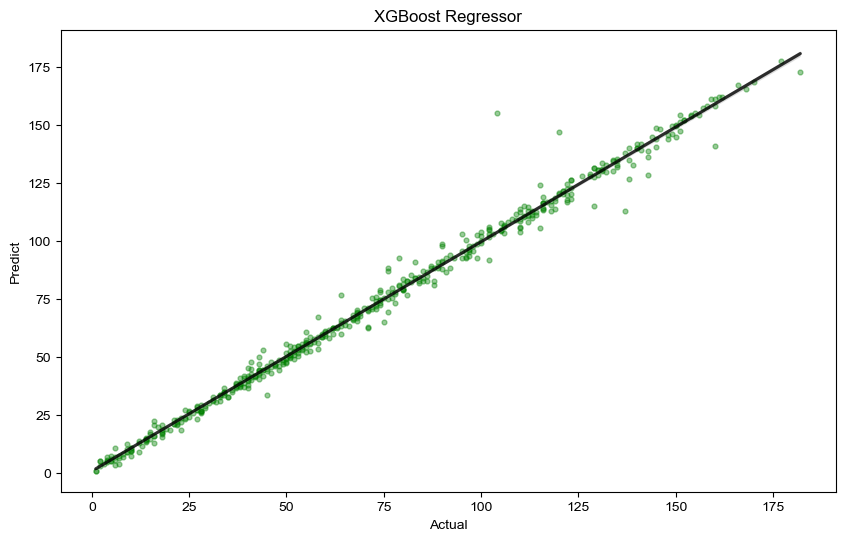

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.set(font_scale=1)

sns.regplot(data=sample_xgb, x='Actual', y='Predict',
            scatter_kws=dict(color='green', s=12, alpha=0.4),
            line_kws=dict(color='black', alpha=0.8), ).set(title='XGBoost Regressor')

# Random Forest Regression

[Text(0.5, 1.0, 'Random Forest Regressor')]

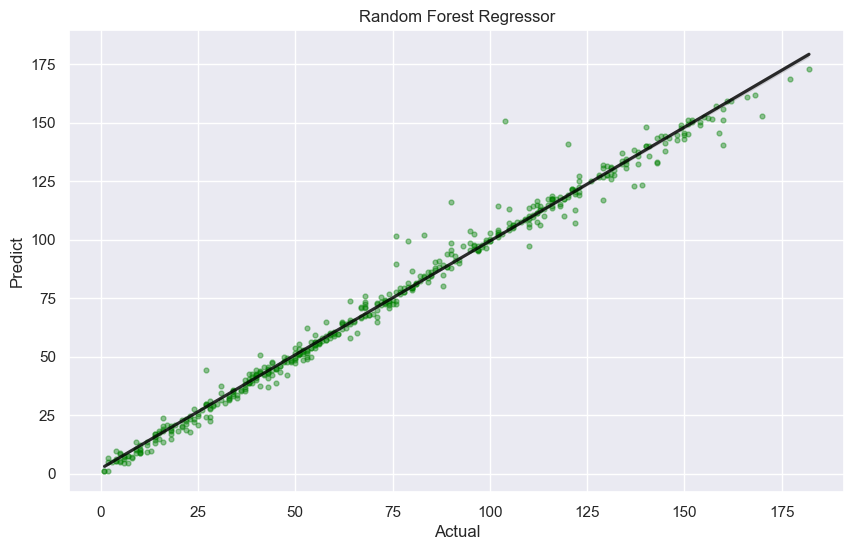

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.set(font_scale=1)

sns.regplot(data=sample_rf, x='Actual', y='Predict',
            scatter_kws=dict(color='green', s=12, alpha=0.4),
            line_kws=dict(color='black', alpha=0.8), ).set(title='Random Forest Regressor')

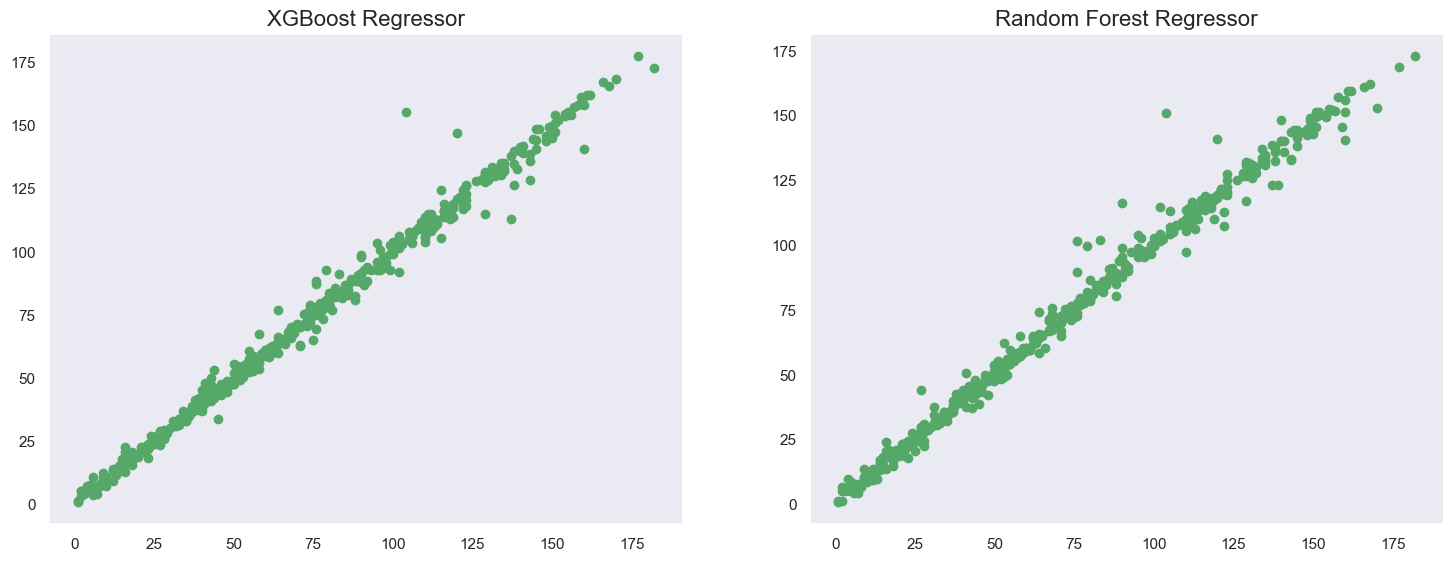

In [27]:
plt.rcParams["figure.figsize"] = (18, 14) 

plt.subplot(2,2,1)
plt.title("XGBoost Regressor", fontsize=16)
plt.scatter(sample_xgb['Actual'], sample_xgb['Predict'], c='g')
plt.grid()

plt.subplot(2,2,2)
plt.title("Random Forest Regressor", fontsize=16)
plt.scatter(sample_rf['Actual'], sample_rf['Predict'], c='g')
plt.grid()

# model extraction

In [28]:
#Model Extraction
pickle.dump(pipe, open('wcsl_womens_score_prediction_final_model.pkl','wb'))

# win probability (first innings)

In [29]:
#load data
first_innings_win_portability_df = pickle.load(open('wcsl_womens_first_innings_win.pkl','rb'))
first_innings_win_portability_df

,batting_team,bowling_team,city,runs_y,result_first_innings
0,Western Storm,Southern Vipers,Southampton,70,0
1,Western Storm,Southern Vipers,Southampton,70,0
2,Western Storm,Southern Vipers,Southampton,70,0
3,Western Storm,Southern Vipers,Southampton,70,0
4,Western Storm,Southern Vipers,Southampton,70,0
...,...,...,...,...,...
9876,Yorkshire Diamonds,Western Storm,Leeds,118,0
9877,Yorkshire Diamonds,Western Storm,Leeds,118,0
9878,Yorkshire Diamonds,Western Storm,Leeds,118,0
9879,Yorkshire Diamonds,Western Storm,Leeds,118,0


In [30]:
first_innings_win_portability_df.to_csv(r'wcsl_womens_first_innings_win.csv', index=False, header=True)
first_innings_win_portability_df = pd.read_csv(r'wcsl_womens_first_innings_win.csv')
first_innings_win_portability_df

,batting_team,bowling_team,city,runs_y,result_first_innings
0,Western Storm,Southern Vipers,Southampton,70,0
1,Western Storm,Southern Vipers,Southampton,70,0
2,Western Storm,Southern Vipers,Southampton,70,0
3,Western Storm,Southern Vipers,Southampton,70,0
4,Western Storm,Southern Vipers,Southampton,70,0
...,...,...,...,...,...
9876,Yorkshire Diamonds,Western Storm,Leeds,118,0
9877,Yorkshire Diamonds,Western Storm,Leeds,118,0
9878,Yorkshire Diamonds,Western Storm,Leeds,118,0
9879,Yorkshire Diamonds,Western Storm,Leeds,118,0


In [31]:
X1 = first_innings_win_portability_df.drop(columns=['result_first_innings'])
y1 = first_innings_win_portability_df['result_first_innings'].values

X1_train,X1_test,y1_train,y1_test = train_test_split(X1, y1, test_size=0.1, random_state=1)

In [32]:
X1_train

,batting_team,bowling_team,city,runs_y
1883,Southern Vipers,Western Storm,Brighton,145
946,Yorkshire Diamonds,Western Storm,York,160
1262,Surrey Stars,Western Storm,London,169
5733,Yorkshire Diamonds,Loughborough Lightning,Leeds,121
1939,Surrey Stars,Southern Vipers,Guildford,141
...,...,...,...,...
2895,Loughborough Lightning,Yorkshire Diamonds,Loughborough,143
7813,Loughborough Lightning,Southern Vipers,Southampton,163
905,Surrey Stars,Southern Vipers,Southampton,127
5192,Loughborough Lightning,Western Storm,Loughborough,125


In [33]:
trf1 = ColumnTransformer([
    ('trf1', OneHotEncoder(sparse=False, drop='first'),['batting_team', 'bowling_team', 'city'])
]
,remainder='passthrough')

In [34]:
pipe1 = Pipeline(steps=[
    ('step1',trf1),
    ('step2', LogisticRegression()) #solver='liblinear'
])

pipe1.fit(X1_train, y1_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression())])

In [35]:
y1_pred = pipe1.predict(X1_test)

print('Accuracy Score: '+str(accuracy_score(y1_test,y1_pred)*100))

Accuracy Score: 92.01213346814964


In [36]:
confusion_matrix_lr = confusion_matrix(y1_test, y1_pred)
confusion_matrix_lr

array([[486,  51],
       [ 28, 424]])

In [37]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.92       537
           1       0.89      0.94      0.91       452

    accuracy                           0.92       989
   macro avg       0.92      0.92      0.92       989
weighted avg       0.92      0.92      0.92       989



In [38]:
pipe1.predict_proba(X1_test)[4]

array([9.99980107e-01, 1.98929382e-05])

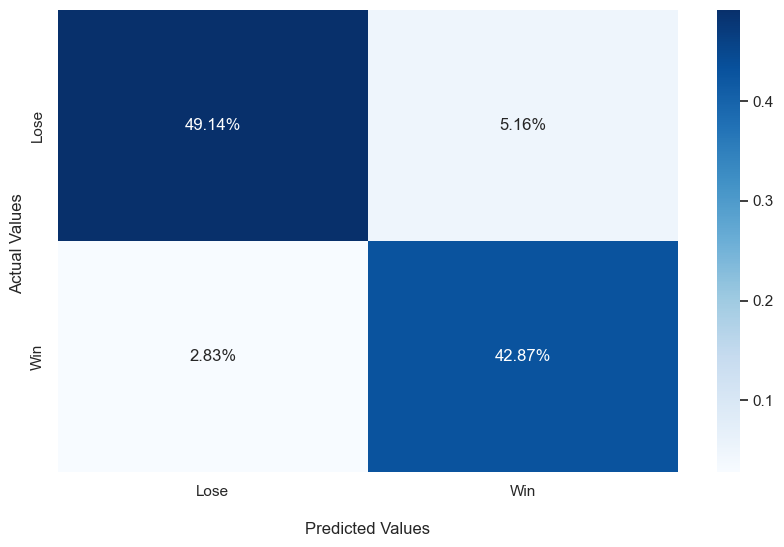

In [39]:
plt.rcParams["figure.figsize"] = (10, 6) 

ax = sns.heatmap(confusion_matrix_lr/np.sum(confusion_matrix_lr), annot=True, fmt='.2%', cmap='Blues')
# ax.set_title('Logistic Regression\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Lose','Win'])
ax.yaxis.set_ticklabels(['Lose','Win'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [41]:
input_df = pd.DataFrame({'batting_team': ['Southern Vipers'], 'bowling_team': ['Western Storm'], 'city': ['Brighton'], 'runs_y': [190]})
result = pipe1.predict_proba(input_df)

loss = result[0][1]
win = result[0][0]

print('win: '+str(round(win*100))+'%')
print('loss: '+str(round(loss*100))+'%')

win: 83%
loss: 17%


# Model Extraction

In [42]:
#Model Extraction
pickle.dump(pipe1, open('wcsl_1st_innings_win_prediction_final_model.pkl','wb'))

# win probability (second innings)

In [43]:
#load data
second_innings_win_portability_df = pickle.load(open('wcsl_womens_second_innings_win.pkl','rb'))
second_innings_win_portability_df

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr,result
0,Southern Vipers,Western Storm,Southampton,0,71,71,119,10,0.00,3.58,1
1,Southern Vipers,Western Storm,Southampton,0,71,71,118,10,0.00,3.61,1
2,Southern Vipers,Western Storm,Southampton,0,71,71,117,10,0.00,3.64,1
3,Southern Vipers,Western Storm,Southampton,0,71,71,116,10,0.00,3.67,1
4,Southern Vipers,Western Storm,Southampton,0,71,71,115,10,0.00,3.70,1
...,...,...,...,...,...,...,...,...,...,...,...
8569,Western Storm,Yorkshire Diamonds,Leeds,117,119,2,25,7,7.39,0.48,1
8570,Western Storm,Yorkshire Diamonds,Leeds,117,119,2,24,7,7.31,0.50,1
8571,Western Storm,Yorkshire Diamonds,Leeds,117,119,2,23,6,7.24,0.52,1
8572,Western Storm,Yorkshire Diamonds,Leeds,118,119,1,22,6,7.22,0.27,1


In [44]:
second_innings_win_portability_df.to_csv(r'wcsl_womens_second_innings_win.csv', index=False, header=True)
second_innings_win_portability_df = pd.read_csv(r'wcsl_womens_second_innings_win.csv')
second_innings_win_portability_df

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr,result
0,Southern Vipers,Western Storm,Southampton,0,71,71,119,10,0.00,3.58,1
1,Southern Vipers,Western Storm,Southampton,0,71,71,118,10,0.00,3.61,1
2,Southern Vipers,Western Storm,Southampton,0,71,71,117,10,0.00,3.64,1
3,Southern Vipers,Western Storm,Southampton,0,71,71,116,10,0.00,3.67,1
4,Southern Vipers,Western Storm,Southampton,0,71,71,115,10,0.00,3.70,1
...,...,...,...,...,...,...,...,...,...,...,...
8555,Western Storm,Yorkshire Diamonds,Leeds,117,119,2,25,7,7.39,0.48,1
8556,Western Storm,Yorkshire Diamonds,Leeds,117,119,2,24,7,7.31,0.50,1
8557,Western Storm,Yorkshire Diamonds,Leeds,117,119,2,23,6,7.24,0.52,1
8558,Western Storm,Yorkshire Diamonds,Leeds,118,119,1,22,6,7.22,0.27,1


In [45]:
X2 = second_innings_win_portability_df.drop(columns=['result'])
y2 = second_innings_win_portability_df['result'].values

X2_train,X2_test,y2_train,y2_test = train_test_split(X2, y2, test_size=0.1, random_state=1)

In [46]:
X2_train

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr
3465,Surrey Stars,Southern Vipers,Brighton,70,148,78,47,8,5.75,9.96
5937,Lancashire Thunder,Loughborough Lightning,Manchester,34,158,124,89,10,6.58,8.36
6371,Yorkshire Diamonds,Southern Vipers,York,28,185,157,101,9,8.84,9.33
4928,Loughborough Lightning,Yorkshire Diamonds,Leeds,14,122,108,108,10,7.00,6.00
6443,Yorkshire Diamonds,Southern Vipers,York,132,185,53,30,5,8.80,10.60
...,...,...,...,...,...,...,...,...,...,...
2895,Lancashire Thunder,Surrey Stars,Manchester,86,168,82,36,6,6.14,13.67
7813,Western Storm,Surrey Stars,Bristol,17,162,145,96,7,4.25,9.06
905,Southern Vipers,Lancashire Thunder,Liverpool,1,88,87,119,10,6.00,4.39
5192,Lancashire Thunder,Yorkshire Diamonds,Liverpool,68,152,84,54,8,6.18,9.33


In [47]:
trf2 = ColumnTransformer([
    ('trf2', OneHotEncoder(sparse=False, drop='first'),['batting_team', 'bowling_team', 'city'])
]
,remainder='passthrough')

In [48]:
pipe2 = Pipeline(steps=[
    ('step1',trf2),
    ('step2',LogisticRegression()) #solver='liblinear'
])

pipe2.fit(X2_train,y2_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression())])

In [49]:
y2_pred = pipe2.predict(X2_test)
print('Accuracy Score: '+str(accuracy_score(y2_test, y2_pred)*100))

Accuracy Score: 89.48598130841121


In [50]:
confusion_matrix1 = confusion_matrix(y2_test, y2_pred)
confusion_matrix1

array([[390,  47],
       [ 43, 376]])

In [51]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       437
           1       0.89      0.90      0.89       419

    accuracy                           0.89       856
   macro avg       0.89      0.89      0.89       856
weighted avg       0.89      0.89      0.89       856



In [52]:
pipe2.predict_proba(X2_test)[10]

array([9.99983110e-01, 1.68895474e-05])

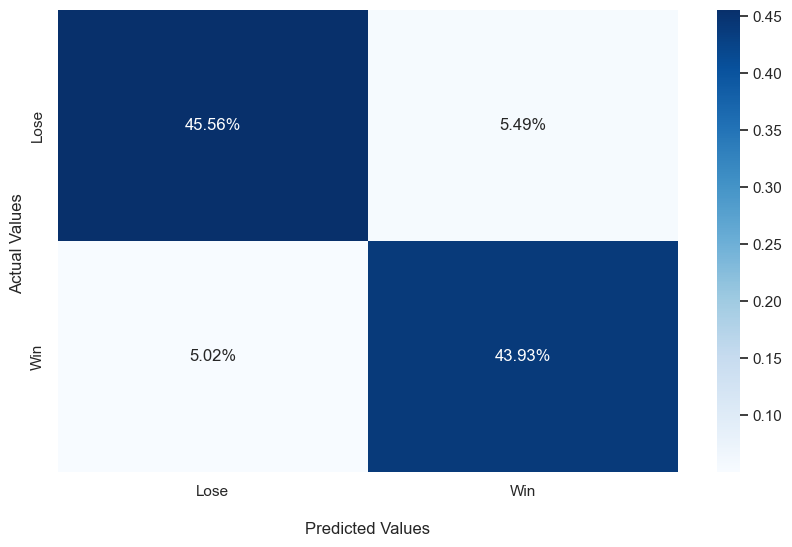

In [53]:
plt.rcParams["figure.figsize"] = (10, 6) 

ax = sns.heatmap(confusion_matrix1/np.sum(confusion_matrix1), annot=True, fmt='.2%', cmap='Blues')
# ax.set_title('Model-1\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Lose','Win'])
ax.yaxis.set_ticklabels(['Lose','Win'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [54]:
input_df = pd.DataFrame({'batting_team': ['Peshawar Zalmi'], 'bowling_team': ['Quetta Gladiators'], 'city': ['Sharjah'], 'current_score':[159], 'target_runs':[169], 'runs_left':[10], 'balls_left': [2], 'wickets_left':[7], 'crr':[8.08], 'rrr': [30.0]})
result = pipe2.predict_proba(input_df)
input_df = pd.DataFrame({'batting_team': ['Lancashire Thunder'], 'bowling_team': ['Southern Vipers'], 'city': ['Southampton'], 'current_score': [120], 'balls_bowled': [108], 'balls_left': [12], 'wickets_left': [6], 'crr': [9.44]})
result = pipe.predict(input_df)[0]

loss = result[0][0]
win = result[0][1]

print('win: '+str(round(win*100))+'%')
print('loss: '+str(round(loss*100))+'%')

ValueError: Found unknown categories ['Peshawar Zalmi'] in column 0 during transform

# Model Extraction

In [126]:
#Model Extraction
pickle.dump(pipe2, open('wcsl_2nd_innings_win_prediction_final_model.pkl','wb'))